In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [26]:
df_size = 1000
np.random.seed(42)
serv_length = np.random.randint(1, 50, df_size)
monthly_charges = np.random.uniform(20, 100, size=1000)
churn_prob = [0.4, 0.6]
churn = np.random.choice(['Yes', 'No'], size=df_size, p=churn_prob)
churn_data = {
    'CustomerID': list(range(1001, 2001)),
    'Gender': np.random.choice(['Male', 'Female'], size=df_size),
    'Age': np.random.randint(18, 70, df_size),
    'ServiceLength (months)': serv_length,
    'ContractType': np.random.choice(['Two-Year', 'One-Year', 'Month-to-Month'], size=df_size),
    'MonthlyCharges (USD)': monthly_charges,
    'TotalCharges (USD)': serv_length * monthly_charges * 0.9,'Churn': churn
}

In [16]:
df = pd.DataFrame(churn_data)

In [18]:
df.head()

,CustomerID,Gender,Age,ServiceLength (months),ContractType,MonthlyCharges (USD),TotalCharges (USD),Churn
0,1001,Male,66,39,Two-Year,75.756917,2659.067786,Yes
1,1002,Female,27,29,Month-to-Month,99.780443,2604.269557,No
2,1003,Male,45,15,Two-Year,91.728821,1238.339084,Yes
3,1004,Male,38,43,Two-Year,66.079873,2557.291102,Yes
4,1005,Male,67,8,Two-Year,93.391649,672.419873,Yes


In [19]:
df.describe()

,CustomerID,Age,ServiceLength (months),MonthlyCharges (USD),TotalCharges (USD)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1500.500000,43.947000,25.379000,60.812403,1374.978457
std,288.819436,14.853984,14.122138,22.597415,960.461013
min,1001.000000,18.000000,1.000000,20.019002,18.074123
25%,1250.750000,32.000000,13.000000,41.524641,564.412028
50%,1500.500000,44.000000,26.000000,62.128091,1205.314557
75%,1750.250000,57.000000,37.000000,79.855529,1944.868429
max,2000.000000,69.000000,49.000000,99.948280,4295.379738


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1000 non-null   int64  
 1   Gender                  1000 non-null   object 
 2   Age                     1000 non-null   int32  
 3   ServiceLength (months)  1000 non-null   int32  
 4   ContractType            1000 non-null   object 
 5   MonthlyCharges (USD)    1000 non-null   float64
 6   TotalCharges (USD)      1000 non-null   float64
 7   Churn                   1000 non-null   object 
dtypes: float64(2), int32(2), int64(1), object(3)
memory usage: 54.8+ KB


In [21]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
ServiceLength (months)    0
ContractType              0
MonthlyCharges (USD)      0
TotalCharges (USD)        0
Churn                     0
dtype: int64

In [22]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [24]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['ContractType'] = label_encoder.fit_transform(df['ContractType'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [25]:
scaler = StandardScaler()
num_cols = ['Age', 'ServiceLength (months)', 'MonthlyCharges (USD)', 'TotalCharges (USD)']
df[num_cols] = scaler.fit_transform(df[num_cols])


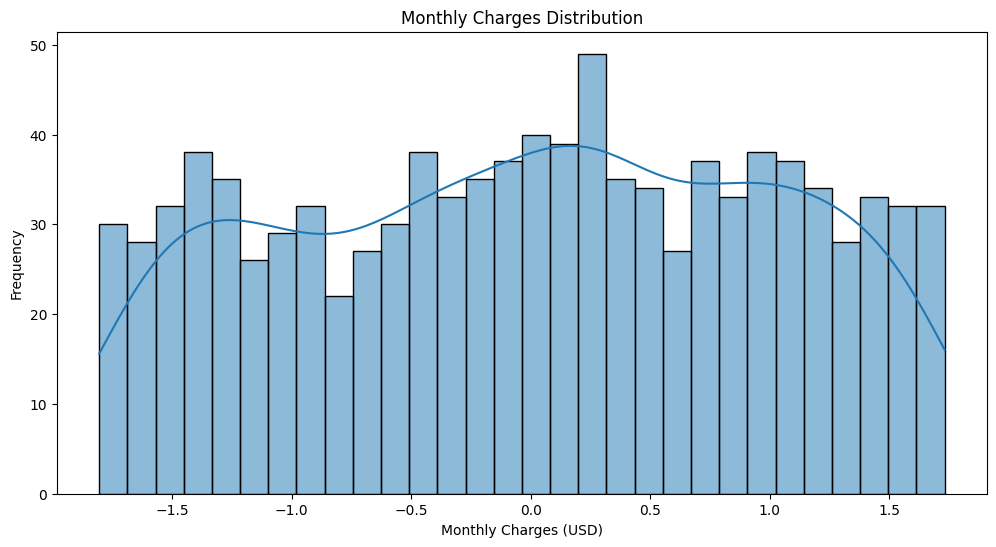

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyCharges (USD)'], bins=30, kde=True)
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges (USD)')
plt.ylabel('Frequency')
plt.show()

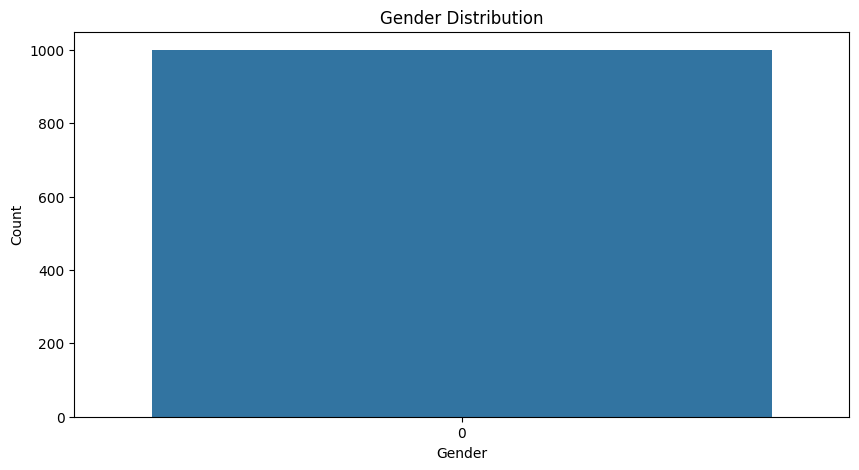

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(df['Gender'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

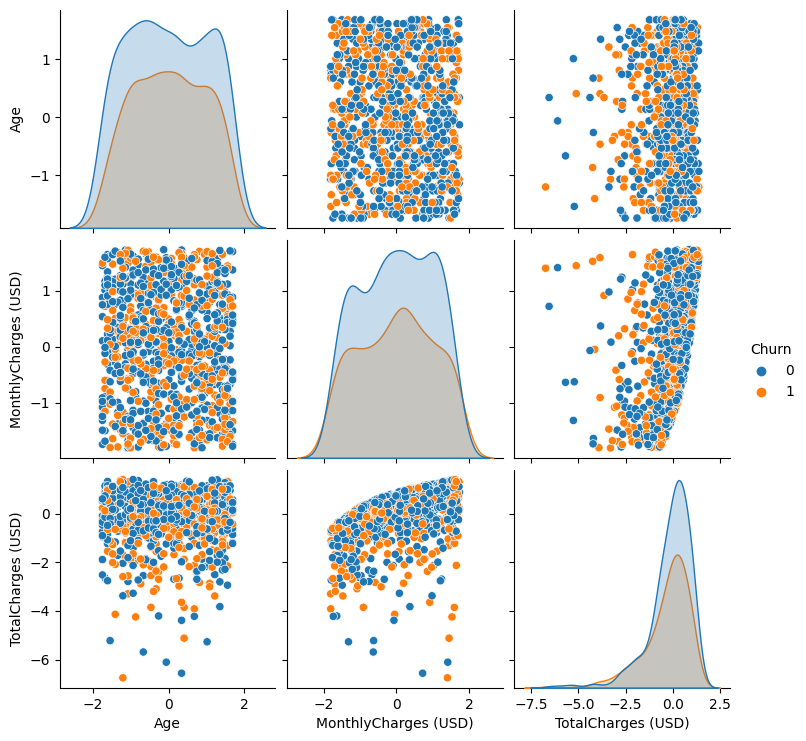

In [31]:
sns.pairplot(df[['Age', 'MonthlyCharges (USD)', 'TotalCharges (USD)', 'Churn']], hue='Churn')
plt.show()


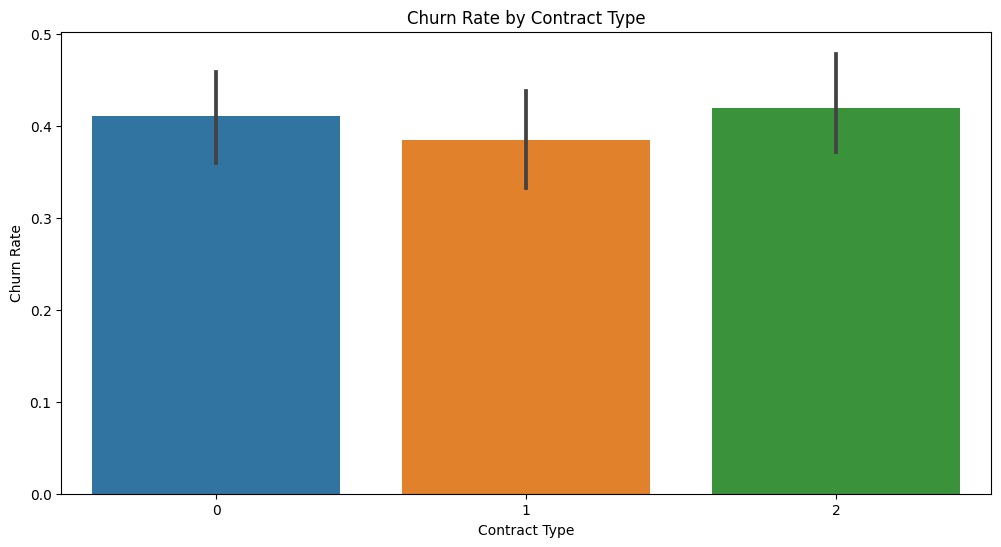

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ContractType', y='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.show()


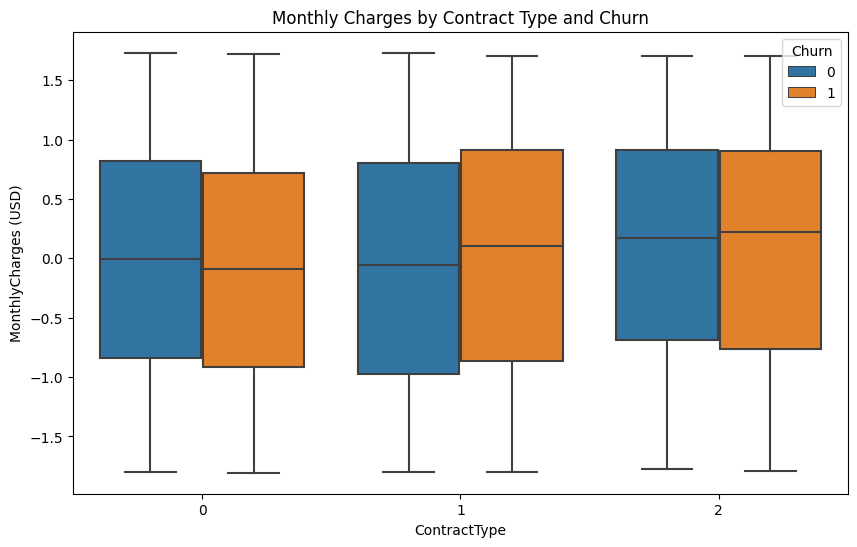

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ContractType', y='MonthlyCharges (USD)', hue='Churn')
plt.title('Monthly Charges by Contract Type and Churn')
plt.show()

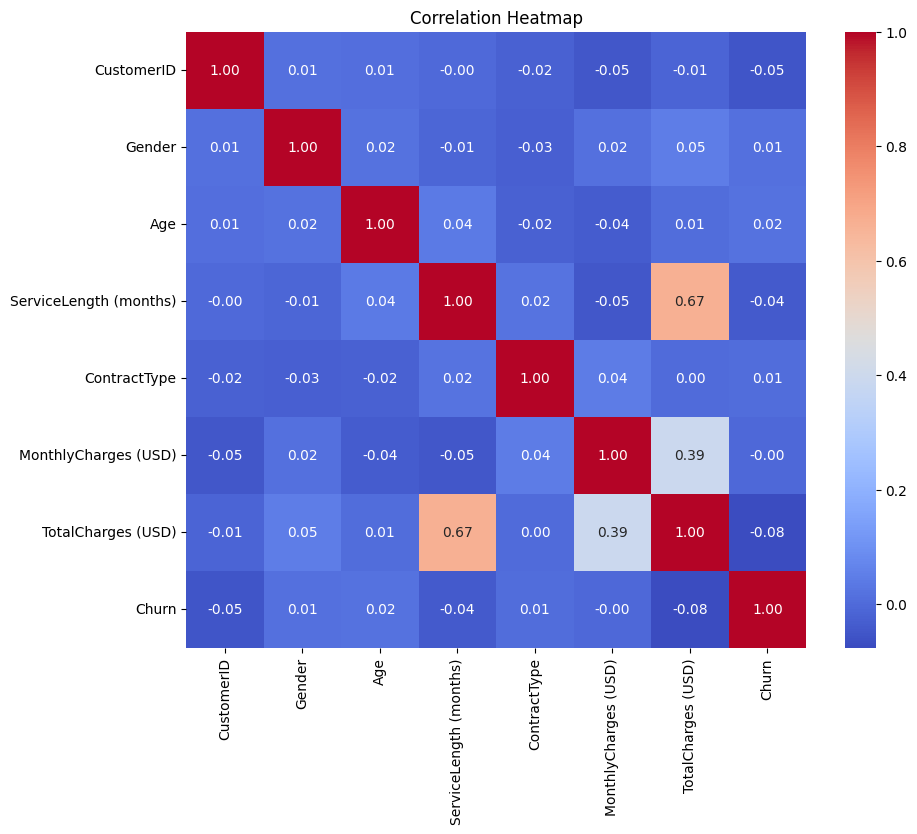

In [35]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [37]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [43]:
missing_values = np.isnan(X_train_scaled).sum()
missing_values

134

In [44]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)

In [48]:
X_train_scaled[np.isnan(X_train_scaled)] = 0
y_train = y_train[~np.isnan(X_train_scaled).any(axis=1)]


In [57]:
logistic_predictions = logistic_model.predict(X_test_scaled)

In [52]:
missing_values = np.isnan(X_test_scaled).sum()
missing_values

36

In [54]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_test_scaled = imputer.fit_transform(X_test_scaled)

In [55]:
X_test_scaled[np.isnan(X_test_scaled)] = 0

In [56]:
y_test = y_test[~np.isnan(X_test_scaled).any(axis=1)]

In [58]:
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Classification Report:\n", classification_report(y_test, logistic_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))


Logistic Regression Model:
Accuracy: 0.615
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.98      0.76       123
           1       0.50      0.03      0.05        77

    accuracy                           0.61       200
   macro avg       0.56      0.50      0.40       200
weighted avg       0.57      0.61      0.49       200

Confusion Matrix:
 [[121   2]
 [ 75   2]]
